分析信用卡詐欺資料並畫出矩陣分析圖

In [2]:
#列出資料筆數
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('C:/Users/lupa/Desktop/python/creditcard.csv')#讀取資料存放地點
print(df.shape)

(284807, 31)


In [3]:
#以表格列出資料
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


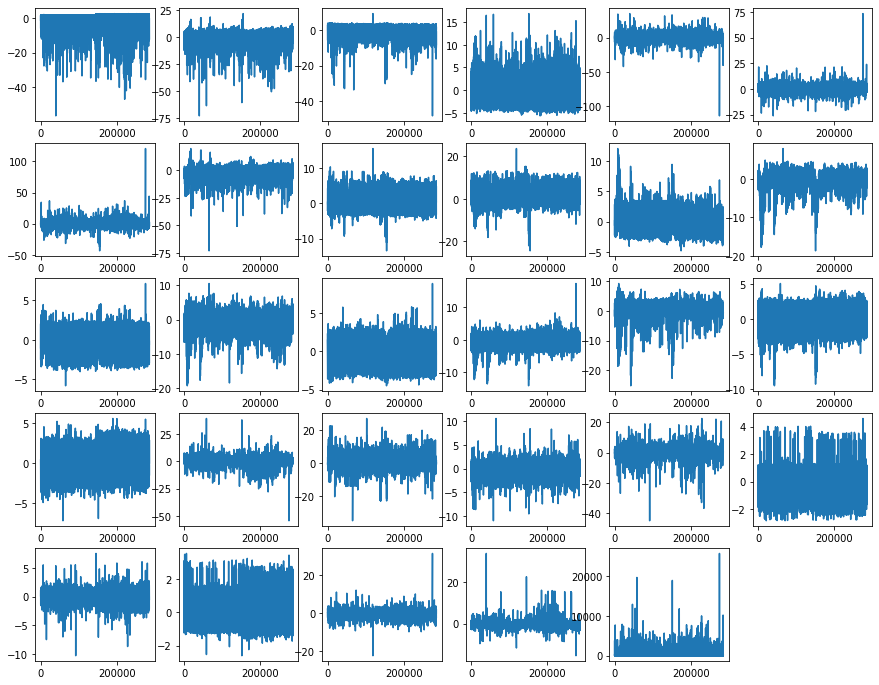

In [4]:
#將每種資料以向量圖表示
fig=plt.figure(figsize = (15,12))
plt.subplot(5,6,1);plt.plot(df.V1); plt.subplot(5,6,15);plt.plot(df.V15);
plt.subplot(5,6,2);plt.plot(df.V2); plt.subplot(5,6,16);plt.plot(df.V16); 
plt.subplot(5,6,3);plt.plot(df.V3); plt.subplot(5,6,17);plt.plot(df.V17); 
plt.subplot(5,6,4);plt.plot(df.V4); plt.subplot(5,6,18);plt.plot(df.V18); 
plt.subplot(5,6,5);plt.plot(df.V5); plt.subplot(5,6,19);plt.plot(df.V19); 
plt.subplot(5,6,6);plt.plot(df.V6); plt.subplot(5,6,20);plt.plot(df.V20); 
plt.subplot(5,6,7);plt.plot(df.V7); plt.subplot(5,6,21);plt.plot(df.V21); 
plt.subplot(5,6,8);plt.plot(df.V8); plt.subplot(5,6,22);plt.plot(df.V22); 
plt.subplot(5,6,9);plt.plot(df.V9); plt.subplot(5,6,23);plt.plot(df.V23); 
plt.subplot(5,6,10);plt.plot(df.V10); plt.subplot(5,6,24);plt.plot(df.V24); 
plt.subplot(5,6,11);plt.plot(df.V11); plt.subplot(5,6,25);plt.plot(df.V25); 
plt.subplot(5,6,12);plt.plot(df.V12); plt.subplot(5,6,26);plt.plot(df.V26); 
plt.subplot(5,6,13);plt.plot(df.V13); plt.subplot(5,6,27);plt.plot(df.V27); 
plt.subplot(5,6,14);plt.plot(df.V14); plt.subplot(5,6,28);plt.plot(df.V28); 
plt.subplot(5,6,29);plt.plot(df.Amount); 
plt.show();

In [6]:
from sklearn.model_selection import train_test_split
feature_names = df.iloc[:,1:30].columns#切出前29比的欄位名稱
target = df.iloc[:1,30:].columns#切出是否詐騙的欄位名稱
data_features = df[feature_names] #切出前29個欄位的資料
data_target = df[target] #切出是否詐騙欄位資料
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size = 0.70, test_size=0.30, random_state = 1)

C:\Users\lupa\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


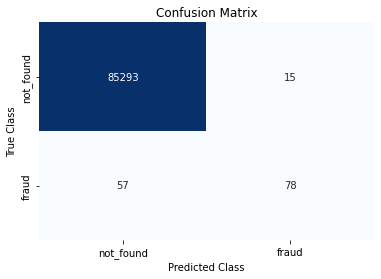

In [7]:
#矩陣
from sklearn.linear_model import LogisticRegression
modle = LogisticRegression()
modle.fit(X_train, y_train.values.ravel())
pred = modle.predict(X_test)
import seaborn as sns
class_names = ['not_found','fraud']
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, pred)
dataframe = pd.DataFrame(matrix,index=class_names,columns=class_names)
sns.heatmap(dataframe,annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix"),plt.xlabel("Predicted Class")
plt.ylabel("True Class"),plt.xlabel("Predicted Class")
plt.show()